# Pandas & Matplotlib
© Advanced Analytics, Amir Ben Haim, 2024

<br>
<br>

## Import `matplotlib` and `pandas`

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

*optional: apply a style to Matplotlib.

In [2]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<br>
<br>

## Creating the `df`

In [3]:
d = {'Years': [1996,1997,1998,1999,1997,1999,1996,1997,1996,1999,1996,1997,1999],
     'Category':['FastFood','Beverages', 'FastFood','Seafood','Beverages', 'FastFood', 'Italian', 'Beverages','Seafood', 'Italian', 'FastFood', 'Beverages','Seafood'],
     'ProductSold':[500,354,264,231,660,561,300,297,305,363,396,297,198],
     'ProductRev':[3267,2838,2871,2904,3663,2838,3399,2871,3102,2574,2541,2805,2838]}

df = pd.DataFrame(d)
df

,Years,Category,ProductSold,ProductRev
0,1996,FastFood,500,3267
1,1997,Beverages,354,2838
2,1998,FastFood,264,2871
3,1999,Seafood,231,2904
4,1997,Beverages,660,3663
5,1999,FastFood,561,2838
6,1996,Italian,300,3399
7,1997,Beverages,297,2871
8,1996,Seafood,305,3102
9,1999,Italian,363,2574


<br>
<br>

## plot()

<p style="font-size:25px"> Pandas uses the plot() method to create diagrams<p>

### Line Plots

In [4]:
dfYears = df.groupby('Years').agg({'ProductSold':'sum','ProductRev':'sum'})
dfYears

,ProductSold,ProductRev
Years,,
1996,1501,12309
1997,1608,12177
1998,264,2871
1999,1353,11154


<p style ="font-size:20px;color:red">Important!<br> Notice that x-axis is the "index" in our DataFrame</p>
<p style ="font-size:20px">*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the columns values</p>

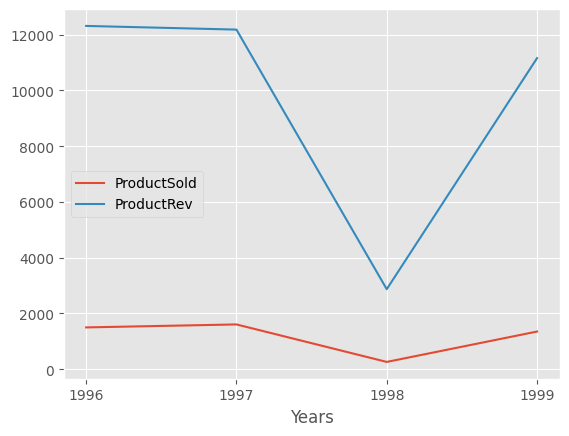

In [10]:
dfYears.plot()

plt.locator_params(axis='x', nbins = len(dfYears)) # --> helps to set the number of values in the x-axis

plt.show()

<p style ="font-size:20px">Another way to do that is to use plt.plot()<p>

In [6]:
dfYears.index

Index([1996, 1997, 1998, 1999], dtype='int64', name='Years')

In [7]:
dfYears.ProductSold

Years
1996    1501
1997    1608
1998     264
1999    1353
Name: ProductSold, dtype: int64

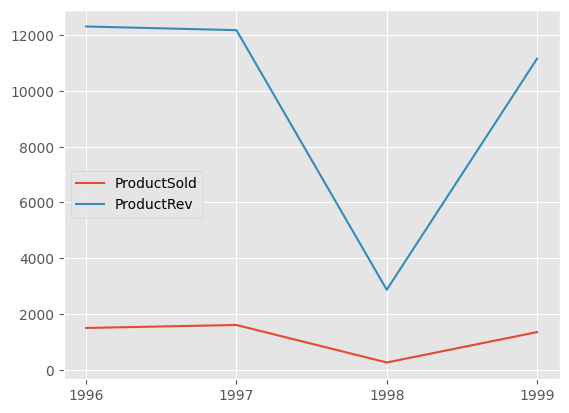

In [8]:
# Or we can use plt

plt.plot(dfYears.index,dfYears.ProductSold, label = 'ProductSold')

plt.plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')

plt.locator_params(axis='x', nbins = len(dfYears))

plt.legend()

plt.show()

<p style ="font-size:30px"><u>Important Conclusion</u><br> We can either use "pandas plot() method" or use "plt.plot()"<p>

<br>

### scatter()

In [ ]:
df

In [ ]:
# Specify that you want a scatter plot with the kind argument:
# kind = 'scatter'

df.plot(kind = 'scatter', x = 'ProductSold', y = 'ProductRev', c = 'r')

plt.show()

<br>

### hist()

In [ ]:
# Histogram
# kind = 'hist'
# A histogram needs only one column

df.ProductSold.plot(kind = 'hist')
plt.show()

In [ ]:
# We can also use "hist" like that
df.ProductSold.hist()
plt.show()

<br>
<br>

### pie()

In [13]:
dfPie = df.groupby('Category').agg({'ProductSold':'sum'})
dfPie

,ProductSold
Category,
Beverages,1608
FastFood,1721
Italian,663
Seafood,734


In [ ]:
# by Categories

dfPie.plot.pie(y='ProductSold', figsize=(10, 20), autopct='%1.1f%%')

plt.legend('')

plt.ylabel('')

plt.title("ProductSold by Categories")

plt.show()

In [ ]:
# Same thing

dfPie.plot(kind = 'pie',y='ProductSold', figsize=(10, 20),  autopct='%1.1f%%')

plt.legend('')

plt.ylabel('')

plt.title("ProductSold by Categories")

plt.show()

In [ ]:
# by Years
dfYears = df.groupby('Years').agg({'ProductSold':'sum'})
dfYears

In [ ]:
# by Years

dfYears.plot.pie(y='ProductSold', figsize=(10, 20), autopct = '%1.1f%%')

plt.legend('')

plt.ylabel('')

plt.title("ProductSold by Year")

plt.show()

<br>
<br>

### bar()

In [11]:
dfYears = df.groupby('Years').agg({'ProductSold':'sum', 'ProductRev':'sum'})
dfYears

,ProductSold,ProductRev
Years,,
1996,1501,12309
1997,1608,12177
1998,264,2871
1999,1353,11154


In [12]:
rev = 11500

['g' if v >= rev else 'r' for v in dfYears.ProductRev]

['g', 'g', 'r', 'r']

In [ ]:
# bar plot
# Years in green if ProductRev >= 11500
rev = 11500

dfYears.plot(kind = 'bar',y = 'ProductRev', color = ['g' if v >= rev else 'r' for v in dfYears.ProductRev])

plt.legend('')

plt.show()

In [ ]:
# a little bit different than the code cell above

# bar plot
# Years in green if ProductRev >= 11500
rev = 11500

dfYears.plot(kind = 'bar',y = 'ProductRev', color = ['g' if dfYears.loc[i]['ProductRev'] > rev else 'r' for i in dfYears.index])

plt.legend('')

plt.show()

<br>
<br>

###  subplots()

In [ ]:
# One "ax" (one Graph)
fig, ax = plt.subplots()

ax.plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')

plt.locator_params(axis='x', nbins = len(dfYears))

plt.legend()

plt.show()

In [ ]:
# 3 "ax" (3 Graph)
fig, ax = plt.subplots(3)

ax[0].plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')
ax[1].plot(dfYears.index,dfYears.ProductSold, label = 'ProductSold')
ax[2].plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].locator_params(axis='x', nbins = len(dfYears))
ax[1].locator_params(axis='x', nbins = len(dfYears))
ax[2].locator_params(axis='x', nbins = len(dfYears))

plt.show()

In [ ]:
# 3 "ax" (3 Graph) beside each other
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')
ax[1].plot(dfYears.index,dfYears.ProductSold, label = 'ProductSold')
ax[2].plot(dfYears.index,dfYears.ProductRev, label = 'ProductRev')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].locator_params(axis='x', nbins = len(dfYears))
ax[1].locator_params(axis='x', nbins = len(dfYears))
ax[2].locator_params(axis='x', nbins = len(dfYears))

plt.show()

In [ ]:
# 6 "ax" (6 Graph) beside each other
fig, ax = plt.subplots(nrows=2, ncols=3)


ax[0,0].plot(dfYears.index,dfYears.ProductRev)
ax[0,1].plot(dfYears.index,dfYears.ProductSold)
ax[0,2].plot(dfYears.index,dfYears.ProductRev)

ax[1,0].plot(dfYears.index,dfYears.ProductRev)
ax[1,1].plot(dfYears.index,dfYears.ProductSold)
ax[1,2].plot(dfYears.index,dfYears.ProductRev)


ax[0,0].locator_params(axis='x', nbins = len(dfYears))
ax[0,1].locator_params(axis='x', nbins = len(dfYears))
ax[0,2].locator_params(axis='x', nbins = len(dfYears))

ax[1,0].locator_params(axis='x', nbins = len(dfYears))
ax[1,1].locator_params(axis='x', nbins = len(dfYears))
ax[1,2].locator_params(axis='x', nbins = len(dfYears))


plt.show()

In [ ]:
# Increasing fig size - one way

# 6 "ax" (6 Graph) beside each other
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))


ax[0,0].plot(dfYears.index,dfYears.ProductRev)
ax[0,1].plot(dfYears.index,dfYears.ProductSold)
ax[0,2].plot(dfYears.index,dfYears.ProductRev)

ax[1,0].plot(dfYears.index,dfYears.ProductRev)
ax[1,1].plot(dfYears.index,dfYears.ProductSold)
ax[1,2].plot(dfYears.index,dfYears.ProductRev)


ax[0,0].locator_params(axis='x', nbins = len(dfYears))
ax[0,1].locator_params(axis='x', nbins = len(dfYears))
ax[0,2].locator_params(axis='x', nbins = len(dfYears))

ax[1,0].locator_params(axis='x', nbins = len(dfYears))
ax[1,1].locator_params(axis='x', nbins = len(dfYears))
ax[1,2].locator_params(axis='x', nbins = len(dfYears))


plt.show()

In [ ]:
# Increasing fig size - Another way

# 6 "ax" (6 Graph) beside each other
fig, ax = plt.subplots(nrows=2, ncols=3)

ax[0,0].plot(dfYears.index,dfYears.ProductRev)
ax[0,1].plot(dfYears.index,dfYears.ProductSold)
ax[0,2].plot(dfYears.index,dfYears.ProductRev)

ax[1,0].plot(dfYears.index,dfYears.ProductRev)
ax[1,1].plot(dfYears.index,dfYears.ProductSold)
ax[1,2].plot(dfYears.index,dfYears.ProductRev)


ax[0,0].locator_params(axis='x', nbins = len(dfYears))
ax[0,1].locator_params(axis='x', nbins = len(dfYears))
ax[0,2].locator_params(axis='x', nbins = len(dfYears))

ax[1,0].locator_params(axis='x', nbins = len(dfYears))
ax[1,1].locator_params(axis='x', nbins = len(dfYears))
ax[1,2].locator_params(axis='x', nbins = len(dfYears))

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()